Hello @everyone ...
Kindly finish the task .i.e

Data Cleaning - Deal with structural errors, transformation and standardization..


Data Manipulation - concatenate and merge the data.


Note: This file contains two sheets`

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Importing data

In [32]:
dt1 = pd.read_excel(r'C:\Users\india\My Python Files\data.xlsx', sheet_name = 0)

In [33]:
dt1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom
...,...,...,...,...,...,...
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,24,4.25,United Kingdom
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,3.39,United Kingdom
231,536390,84030E,ENGLISH ROSE HOT WATER BOTTLE,24,3.75,United Kingdom
232,536390,22174,PHOTO CUBE,48,1.48,United Kingdom


In [34]:
dt2 = pd.read_excel(r'C:\Users\india\My Python Files\data.xlsx', sheet_name = 1)

In [9]:
dt2

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0
...,...,...
541904,581587,12680.0
541905,581587,12680.0
541906,581587,12680.0
541907,581587,12680.0


In [12]:
dt1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Country'],
      dtype='object')

In [16]:
dt2.columns

Index(['InvoiceNo', 'CustomerID'], dtype='object')

In [18]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    234 non-null    object 
 1   StockCode    234 non-null    object 
 2   Description  234 non-null    object 
 3   Quantity     234 non-null    object 
 4   UnitPrice    234 non-null    float64
 5   Country      234 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.1+ KB


In [26]:
dt1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


### structural errors

In [132]:
dt1['Quantity'] = dt1['Quantity'].replace(r'[%*#&]', '',regex = True).astype('int16')

In [133]:
dt1['Quantity'] 

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: int16

In [134]:
dt1["InvoiceNo"]=dt1["InvoiceNo"].replace(['C'],'',regex = True).astype("int64")

In [135]:
dt1["InvoiceNo"]

0      536365
1      536365
2      536365
3      536365
4      536365
        ...  
229    536390
230    536390
231    536390
232    536390
233    536390
Name: InvoiceNo, Length: 234, dtype: int64

### Transformation (trail and error)

In [116]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
#when the data is not normally distributed then we need to transform the data

In [77]:
dt1['UnitPrice'].mean(), dt1['UnitPrice'].median()

(3.5843589743589743, 2.55)

<Axes: ylabel='Density'>

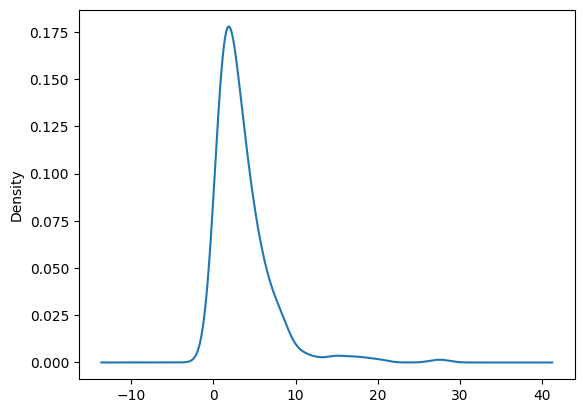

In [78]:
dt1['UnitPrice'].plot(kind = 'kde')

<Axes: ylabel='Density'>

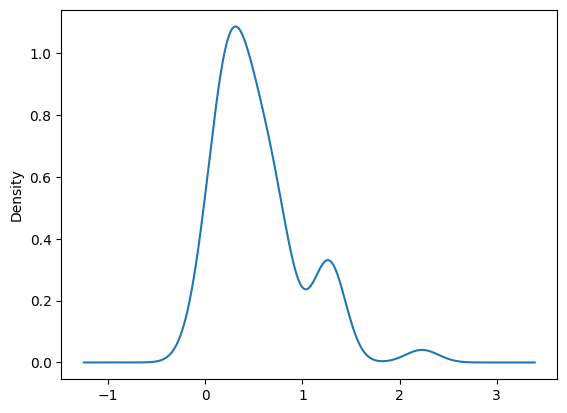

In [102]:
np.log(dt1['UnitPrice']).plot(kind = 'kde')

<Axes: ylabel='Density'>

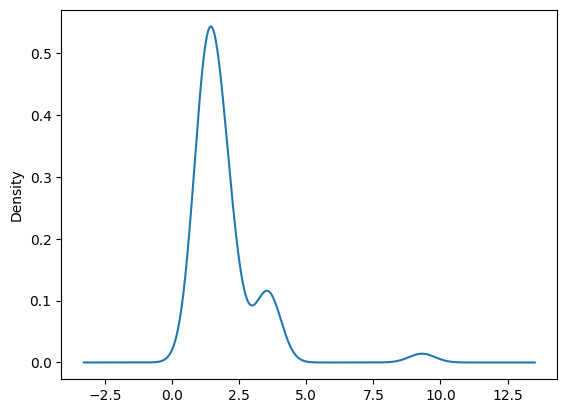

In [117]:
dt1['UnitPrice'].plot(kind = 'kde')

<Axes: ylabel='Density'>

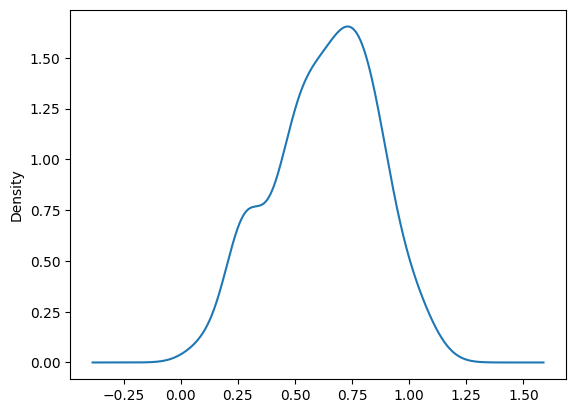

In [118]:
np.reciprocal(dt1['UnitPrice']).plot(kind = 'kde')

In [119]:
dt1['UnitPrice'] = np.sqrt(dt1['UnitPrice'])

<Axes: ylabel='Density'>

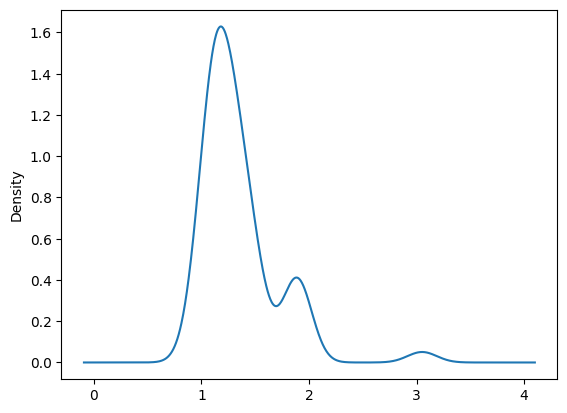

In [120]:
dt1['UnitPrice'].plot(kind = 'kde')

In [121]:
dt1['Quantity'].mean()

23.22222222222222

In [122]:
dt1['Quantity'].median()

6.0

<Axes: ylabel='Density'>

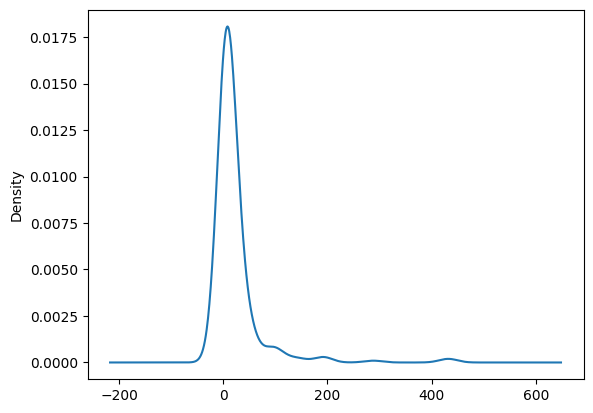

In [128]:
dt1['Quantity'].plot(kind = 'kde')

<Axes: ylabel='Density'>

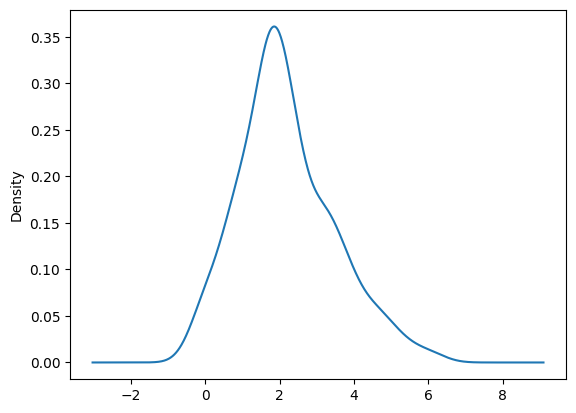

In [123]:
np.log(dt1['Quantity']).plot(kind = 'kde')

<Axes: ylabel='Density'>

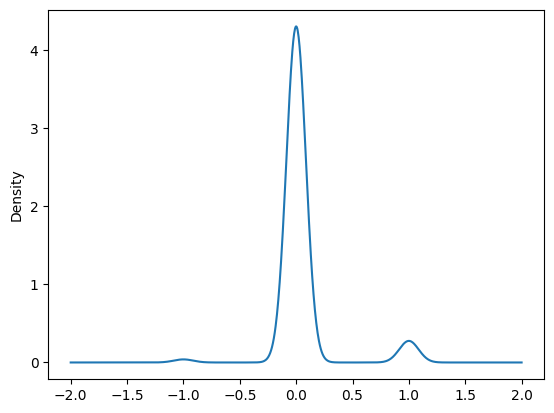

In [124]:
np.reciprocal(dt1['Quantity']).plot(kind = 'kde')

### Standardization

In [131]:
def standard(x):
    n = (x-dt1['Quantity'].mean())/(dt1['Quantity'].std())
    return n
dt1['Quantity'].apply(standard)

0     -0.329666
1     -0.329666
2     -0.291383
3     -0.329666
4     -0.329666
         ...   
229    0.014888
230    0.014888
231    0.014888
232    0.474294
233    1.393106
Name: Quantity, Length: 234, dtype: float64

In [27]:
#pd.concat()

In [40]:
pd.concat([dt1,dt2],axis = 0,ignore_index = True)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom,NaN
...,...,...,...,...,...,...,...
542138,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542139,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542140,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542141,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [41]:
#pd.merge()

In [44]:
pd.merge(dt1, dt2, on = 'InvoiceNo', how = 'inner')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0


In [43]:
pd.merge(dt1, dt2, on = 'InvoiceNo', how = 'outer')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [45]:
pd.merge(dt1, dt2, on = 'InvoiceNo', how = 'right')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom,17850.0
...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [46]:
pd.merge(dt1, dt2, on = 'InvoiceNo', how = 'left')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,17850.0
...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,17511.0
